In [3]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
conn = psycopg2.connect(
    host="localhost",
    port="55432",
    database="northwind",
    user="postgres",
    password="postgres"
)

In [21]:
query = """
SELECT
    customers.customer_id,
    customers.contact_name,
    SUM((order_details.quantity * order_details.unit_price)- order_details.discount) AS jumlah_penjualan
FROM
    customers
JOIN
    orders ON customers.customer_id = orders.customer_id
JOIN
    order_details ON orders.order_id = order_details.order_id
GROUP BY
    customers.customer_id, customers.contact_name
ORDER BY
    jumlah_penjualan DESC """

df = pd.read_sql_query(query, conn)
df

C:\Users\Michael Luwi Pallea\AppData\Local\Temp\ipykernel_33336\4209508928.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


,customer_id,contact_name,jumlah_penjualan
0,QUICK,Horst Kloss,117477.440148
1,SAVEA,Jose Pavarotti,115663.789643
2,ERNSH,Roland Mendel,113229.729782
3,HUNGO,Patricia McKenna,57311.140162
4,RATTC,Paula Wilson,52243.410347
...,...,...,...
84,GALED,Eduardo Saavedra,836.699995
85,NORTS,Simon Crowther,649.000000
86,LAUGB,Yoshi Tannamuri,522.499992
87,LAZYK,John Steel,356.999998


In [ ]:
SELECT 
    c.CustomerID,
    c.CompanyName,
    strftime('%Y', o.OrderDate) AS Year,
    p.CategoryID,
    cat.CategoryName,
    SUM(od.Quantity * od.UnitPrice * (1 - od.Discount)) AS TotalSales
FROM 
    Orders o
INNER JOIN 
    "Order Details" od ON o.OrderID = od.OrderID
INNER JOIN 
    Customers c ON o.CustomerID = c.CustomerID
INNER JOIN 
    Products p ON od.ProductID = p.ProductID
INNER JOIN 
    Categories cat ON p.CategoryID = cat.CategoryID
GROUP BY 
    c.CustomerID,
    c.CompanyName,
    Year,
    p.CategoryID,
    cat.CategoryName
ORDER BY 
    c.CustomerID,
    Year,
    p.CategoryID;


In [38]:
query = """
SELECT 
    customers.customer_id,
    customers.company_name,
    EXTRACT(YEAR FROM orders.order_date) AS Year,
    categories.category_id,
    categories.category_name,
    SUM(order_details.quantity * order_details.unit_price * (1 - order_details.discount)) AS TotalSales
FROM 
    orders
INNER JOIN 
    order_details ON orders.order_id = order_details.order_id
INNER JOIN 
    customers ON orders.customer_id = customers.customer_id
INNER JOIN 
    products ON order_details.product_id = products.product_id
INNER JOIN 
    categories ON products.category_id = categories.category_id
GROUP BY 
    customers.customer_id,
    customers.company_name,
    Year,
    categories.category_id,
    categories.category_name
ORDER BY 
    customers.customer_id,
    Year,
    categories.category_id; """

df = pd.read_sql_query(query, conn)
df

C:\Users\Michael Luwi Pallea\AppData\Local\Temp\ipykernel_33336\1650217791.py:30: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


,customer_id,company_name,year,category_id,category_name,totalsales
0,ALFKI,Alfreds Futterkiste,1997.0,1,Beverages,553.500000
1,ALFKI,Alfreds Futterkiste,1997.0,2,Condiments,938.000031
2,ALFKI,Alfreds Futterkiste,1997.0,7,Produce,512.999983
3,ALFKI,Alfreds Futterkiste,1997.0,8,Seafood,18.000000
4,ALFKI,Alfreds Futterkiste,1998.0,2,Condiments,400.800000
...,...,...,...,...,...,...
1071,WOLZA,Wolski Zajazd,1997.0,6,Meat/Poultry,22.349999
1072,WOLZA,Wolski Zajazd,1998.0,1,Beverages,340.500000
1073,WOLZA,Wolski Zajazd,1998.0,2,Condiments,627.000000
1074,WOLZA,Wolski Zajazd,1998.0,3,Confections,591.599991


In [42]:
query = """
SELECT 
    employees.employee_id,
    employees.first_name || ' ' || employees.last_name AS employee_name,
    SUM(order_details.quantity * order_details.unit_price * (1 - order_details.discount)) AS total_sales
FROM 
    orders
INNER JOIN 
    order_details ON orders.order_id = order_details.order_id
INNER JOIN 
    employees ON orders.employee_id = employees.employee_id
GROUP BY 
    employees.employee_id,
    employees.first_name,
    employees.last_name
ORDER BY 
    total_sales DESC
LIMIT 3; """

df = pd.read_sql_query(query, conn)
df

C:\Users\Michael Luwi Pallea\AppData\Local\Temp\ipykernel_33336\3050886777.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


,employee_id,employee_name,total_sales
0,4,Margaret Peacock,232890.845982
1,3,Janet Leverling,202812.842388
2,1,Nancy Davolio,192107.604657


In [46]:
query = """
SELECT 
    employees.employee_id,
    employees.first_name || ' ' || employees.last_name AS employee_name,
    products.product_id,
    products.product_name,
    EXTRACT(YEAR FROM orders.order_date) AS year,
    SUM(order_details.quantity * order_details.unit_price * (1 - order_details.discount)) AS total_sales
FROM 
    orders
INNER JOIN 
    order_details ON orders.order_id = order_details.order_id
INNER JOIN 
    employees ON orders.employee_id = employees.employee_id
INNER JOIN 
    products ON order_details.product_id = products.product_id
GROUP BY 
    employees.employee_id,
    employees.first_name,
    employees.last_name,
    products.product_id,
    products.product_name,
    year
ORDER BY 
    employees.employee_id,
    year,
    total_sales DESC; """


df = pd.read_sql_query(query, conn)
df


C:\Users\Michael Luwi Pallea\AppData\Local\Temp\ipykernel_33336\858712103.py:30: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


,employee_id,employee_name,product_id,product_name,year,total_sales
0,1,Nancy Davolio,62,Tarte au sucre,1996.0,4038.500155
1,1,Nancy Davolio,38,Côte de Blaye,1996.0,4005.200055
2,1,Nancy Davolio,43,Ipoh Coffee,1996.0,2318.399951
3,1,Nancy Davolio,60,Camembert Pierrot,1996.0,1955.680050
4,1,Nancy Davolio,26,Gumbär Gummibärchen,1996.0,1705.649974
...,...,...,...,...,...,...
1148,9,Anne Dodsworth,44,Gula Malacca,1998.0,99.195003
1149,9,Anne Dodsworth,13,Konbu,1998.0,96.000000
1150,9,Anne Dodsworth,41,Jack's New England Clam Chowder,1998.0,55.004998
1151,9,Anne Dodsworth,24,Guaraná Fantástica,1998.0,45.000000


In [52]:
query = """ 
WITH SalesPerEmployee AS (
    SELECT 
        employees.employee_id,
        employees.first_name || ' ' || employees.last_name AS employee_name,
        products.product_id,
        products.product_name,
        EXTRACT(YEAR FROM orders.order_date) AS year,
        SUM(order_details.quantity * order_details.unit_price * (1 - order_details.discount)) AS total_sales
    FROM 
        orders
    INNER JOIN 
        order_details ON orders.order_id = order_details.order_id
    INNER JOIN 
        employees ON orders.employee_id = employees.employee_id
    INNER JOIN 
        products ON order_details.product_id = products.product_id
    GROUP BY 
        employees.employee_id,
        employees.first_name,
        employees.last_name,
        products.product_id,
        products.product_name,
        year
)
SELECT 
    employee_id,
    employee_name,
    product_id,
    product_name,
    year,
    total_sales
FROM (
    SELECT 
        employee_id,
        employee_name,
        product_id,
        product_name,
        year,
        total_sales,
        RANK() OVER (PARTITION BY product_id, year ORDER BY total_sales DESC) AS sales_rank
    FROM 
        SalesPerEmployee
) ranked_sales
WHERE 
    sales_rank = 1
ORDER BY 
    year,
    product_id; """

df = pd.read_sql_query(query, conn)
df

C:\Users\Michael Luwi Pallea\AppData\Local\Temp\ipykernel_33336\3006788951.py:51: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


,employee_id,employee_name,product_id,product_name,year,total_sales
0,1,Nancy Davolio,1,Chai,1996.0,518.399984
1,6,Michael Suyama,2,Chang,1996.0,1139.999986
2,7,Robert King,3,Aniseed Syrup,1996.0,240.000000
3,4,Margaret Peacock,4,Chef Anton's Cajun Seasoning,1996.0,1038.400023
4,1,Nancy Davolio,5,Chef Anton's Gumbo Mix,1996.0,883.999997
...,...,...,...,...,...,...
225,2,Andrew Fuller,74,Longlife Tofu,1998.0,200.000000
226,8,Laura Callahan,74,Longlife Tofu,1998.0,200.000000
227,1,Nancy Davolio,75,Rhönbräu Klosterbier,1998.0,991.999999
228,8,Laura Callahan,76,Lakkalikööri,1998.0,2892.599998


In [ ]:
query = """
SELECT 
    customers.country, 
    '$' || ROUND(SUM(order_details.quantity * order_details.unit_price * (1 - order_details.discount)), 2) AS total_sales_dollar
FROM 
    orders o
INNER JOIN 
    order_details od ON o.order_id = od.order_id
INNER JOIN 
    customers c ON o.customer_id = c.customer_id
GROUP BY 
    c.country
ORDER BY 
    total_sales DESC
LIMIT 1; """

df = pd.read_sql_query(query, conn)
df

In [59]:
query = """
WITH SalesPerEmployee AS (
    SELECT 
        employees.employee_id,
        employees.first_name || ' ' || employees.last_name AS employee_name,
        products.product_id,
        products.product_name,
        EXTRACT(YEAR FROM orders.order_date) AS year,
        SUM(order_details.quantity * order_details.unit_price * (1 - order_details.discount)) AS total_sales
    FROM 
        orders
    INNER JOIN 
        order_details ON orders.order_id = order_details.order_id
    INNER JOIN 
        employees ON orders.employee_id = employees.employee_id
    INNER JOIN 
        products ON order_details.product_id = products.product_id
    GROUP BY 
        employees.employee_id,
        employees.first_name,
        employees.last_name,
        products.product_id,
        products.product_name,
        year
)
SELECT 
    employee_id,
    employee_name,
    product_id,
    product_name,
    year,
    total_sales
FROM (
    SELECT 
        employee_id,
        employee_name,
        product_id,
        product_name,
        year,
        total_sales,
        RANK() OVER (PARTITION BY product_id, year ORDER BY total_sales DESC) AS sales_rank
    FROM 
        SalesPerEmployee
) ranked_sales
WHERE 
    sales_rank = 1
ORDER BY 
    year,
    product_id; """

df = pd.read_sql_query(query, conn)
df

C:\Users\Michael Luwi Pallea\AppData\Local\Temp\ipykernel_33336\1691019777.py:51: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


,employee_id,employee_name,product_id,product_name,year,total_sales
0,1,Nancy Davolio,1,Chai,1996.0,518.399984
1,6,Michael Suyama,2,Chang,1996.0,1139.999986
2,7,Robert King,3,Aniseed Syrup,1996.0,240.000000
3,4,Margaret Peacock,4,Chef Anton's Cajun Seasoning,1996.0,1038.400023
4,1,Nancy Davolio,5,Chef Anton's Gumbo Mix,1996.0,883.999997
...,...,...,...,...,...,...
225,2,Andrew Fuller,74,Longlife Tofu,1998.0,200.000000
226,8,Laura Callahan,74,Longlife Tofu,1998.0,200.000000
227,1,Nancy Davolio,75,Rhönbräu Klosterbier,1998.0,991.999999
228,8,Laura Callahan,76,Lakkalikööri,1998.0,2892.599998


In [64]:
query = """
WITH SalesPerEmployee AS (
    SELECT 
        employees.employee_id,
        employees.first_name || ' ' || employees.last_name AS employee_name,
        products.product_id,
        products.product_name,
        EXTRACT(YEAR FROM orders.order_date) AS year,
        SUM(order_details.quantity * order_details.unit_price * (1 - order_details.discount)) AS total_sales
    FROM 
        orders
    INNER JOIN 
        order_details ON orders.order_id = order_details.order_id
    INNER JOIN 
        employees ON orders.employee_id = employees.employee_id
    INNER JOIN 
        products ON order_details.product_id = products.product_id
    GROUP BY 
        employees.employee_id,
        employees.first_name,
        employees.last_name,
        products.product_id,
        products.product_name,
        year
)
SELECT 
    employee_id,
    employee_name,
    product_id,
    product_name,
    year,
    total_sales
FROM (
    SELECT 
        employee_id,
        employee_name,
        product_id,
        product_name,
        year,
        total_sales,
        ROW_NUMBER() OVER (PARTITION BY year ORDER BY total_sales DESC) AS sales_rank
    FROM 
        SalesPerEmployee
) ranked_sales
WHERE 
    sales_rank = 1
ORDER BY 
    year; """

df = pd.read_sql_query(query, conn)
df

C:\Users\Michael Luwi Pallea\AppData\Local\Temp\ipykernel_33336\437393629.py:50: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


,employee_id,employee_name,product_id,product_name,year,total_sales
0,7,Robert King,38,Côte de Blaye,1996.0,8432.000091
1,4,Margaret Peacock,38,Côte de Blaye,1997.0,15810.000153
2,2,Andrew Fuller,38,Côte de Blaye,1998.0,21606.999988


In [72]:
query = """
SELECT 
    customers.country, 
    SUM(order_details.quantity * order_details.unit_price * (1 - order_details.discount)) AS total_sales
FROM 
    orders
INNER JOIN 
    order_details ON orders.order_id = order_details.order_id
INNER JOIN 
    customers ON orders.customer_id = customers.customer_id
GROUP BY 
    customers.country
ORDER BY 
    total_sales DESC; """

df = pd.read_sql_query(query, conn)
df.head()

C:\Users\Michael Luwi Pallea\AppData\Local\Temp\ipykernel_33336\4071952360.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


,country,total_sales
0,USA,245584.610302
1,Germany,230284.633254
2,Austria,128003.838159
3,Brazil,106925.776404
4,France,81358.322530


C:\Users\Michael Luwi Pallea\AppData\Local\Temp\ipykernel_33336\1976324214.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


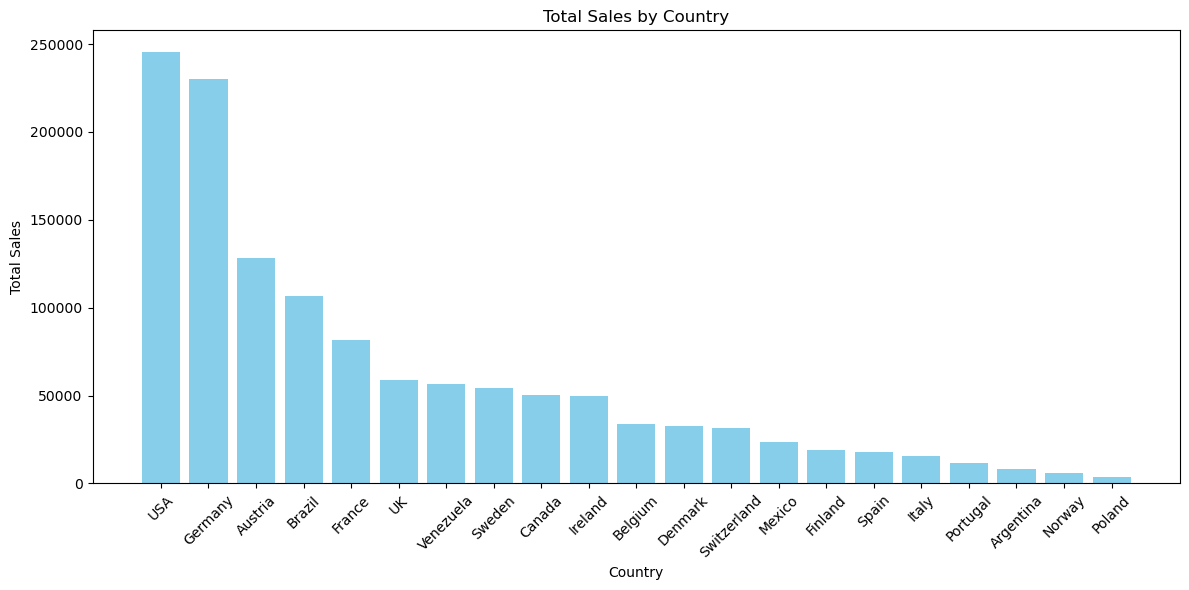

In [68]:


query = """
SELECT 
    customers.country, 
    SUM(order_details.quantity * order_details.unit_price * (1 - order_details.discount)) AS total_sales
FROM 
    orders
INNER JOIN 
    order_details ON orders.order_id = order_details.order_id
INNER JOIN 
    customers ON orders.customer_id = customers.customer_id
GROUP BY 
    customers.country
ORDER BY 
    total_sales DESC;
"""

df = pd.read_sql_query(query, conn)
# Membuat visualisasi menggunakan bar chart
plt.figure(figsize=(12, 6))
plt.bar(df['country'], df['total_sales'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.title('Total Sales by Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [78]:
query = """
SELECT 
    employee.employee_id,
    employee.first_name || ' ' || employee.last_name AS employee_name,
    EXTRACT(YEAR FROM orders.order_date) AS year,
    SUM(order_details.quantity * order_details.unit_price * (1 - order_details.discount)) AS total_sales,
    AVG(SUM(order_details.quantity * order_details.unit_price * (1 - order_details.discount))) OVER (PARTITION BY employee.employee_id, EXTRACT(YEAR FROM orders.order_date)) AS average_monthly_sales
FROM 
    orders
INNER JOIN 
    order_details ON orders.order_id = order_details.order_id
INNER JOIN 
    employees AS employee ON orders.employee_id = employee.employee_id
GROUP BY 
    employee.employee_id,
    employee.first_name,
    employee.last_name,
    EXTRACT(YEAR FROM orders.order_date)
ORDER BY 
    employee.employee_id,
    year; """

df = pd.read_sql_query(query, conn)
df.head()

C:\Users\Michael Luwi Pallea\AppData\Local\Temp\ipykernel_33336\2536212494.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


,employee_id,employee_name,year,total_sales,average_monthly_sales
0,1,Nancy Davolio,1996.0,35764.515213,35764.515213
1,1,Nancy Davolio,1997.0,93148.077492,93148.077492
2,1,Nancy Davolio,1998.0,63195.011951,63195.011951
3,2,Andrew Fuller,1996.0,21757.060258,21757.060258
4,2,Andrew Fuller,1997.0,70444.140041,70444.140041
